# Testing Awal

## Input image Botol AVENT

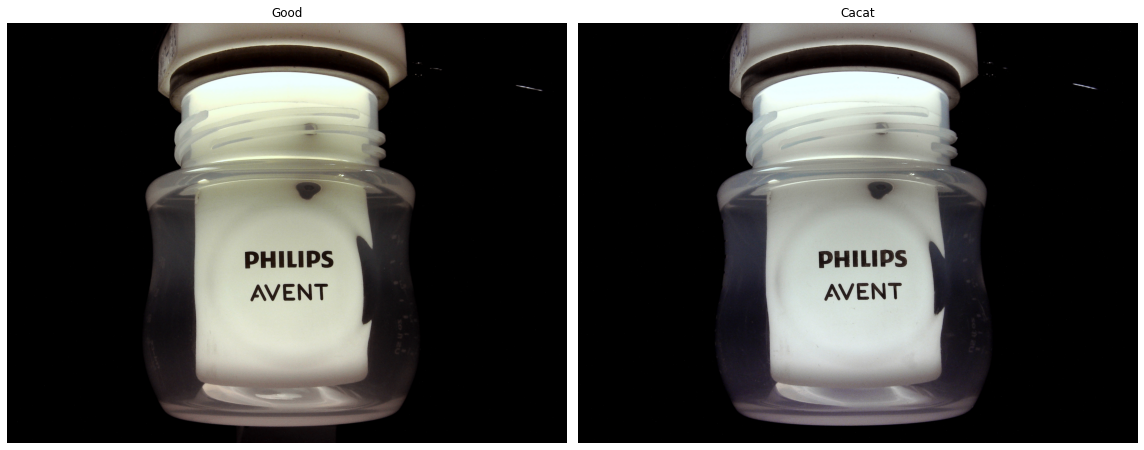

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

image1 = Image.open(r"E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\good\GOOD_AVENT20230728112550235490.jpg")
image2 = Image.open(r"E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\reject\REJECT_AVENT20230728115523661642.jpg")

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].imshow(image1)
axes[0].axis('off')
axes[0].set_title("Good")

axes[1].imshow(image2)
axes[1].axis('off')
axes[1].set_title("Cacat")

plt.tight_layout()
plt.show()

## Cropping Logo

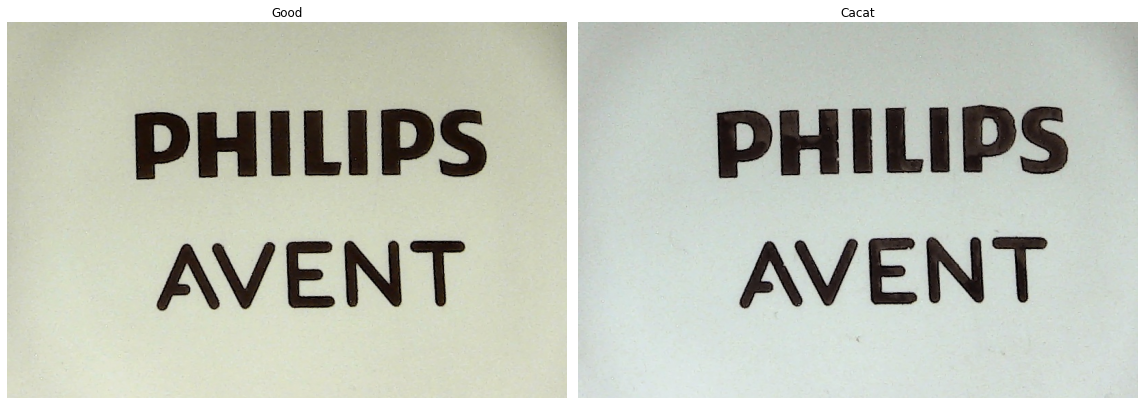

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

left1, upper1, right1, lower1 = 1200, 1200, 2020, 1750
cropped_image1 = image1.crop((left1, upper1, right1, lower1))

left2, upper2, right2, lower2 = 1200, 1200, 2020, 1750
cropped_image2 = image2.crop((left2, upper2, right2, lower2))

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].imshow(cropped_image1)
axes[0].axis('off')
axes[0].set_title("Good")

axes[1].imshow(cropped_image2)
axes[1].axis('off')
axes[1].set_title("Cacat")

plt.tight_layout()
plt.show()

## Threshold Biner (0 dan 255)


### Brightness & Threshold (Filter >120)

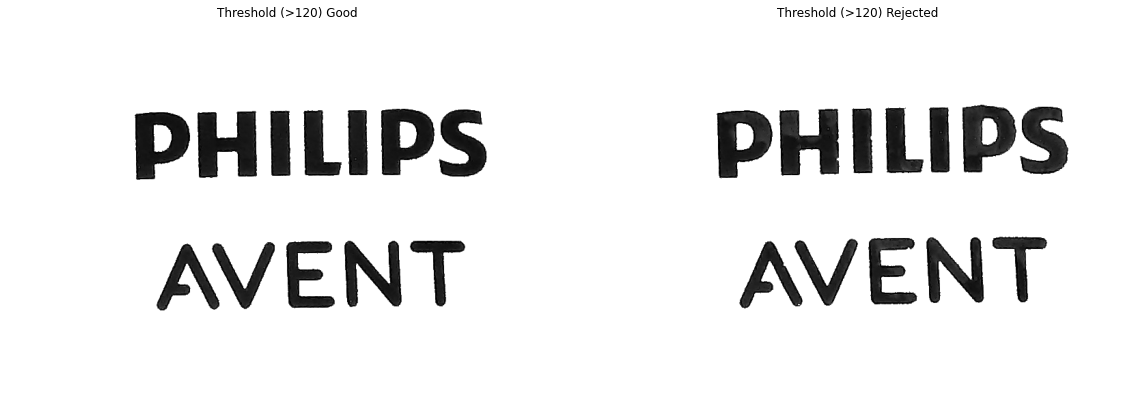

In [3]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Convert PIL Image to NumPy array
image1_th1 = cv2.cvtColor(np.array(cropped_image1), cv2.COLOR_RGB2GRAY)
image2_th2 = cv2.cvtColor(np.array(cropped_image2), cv2.COLOR_RGB2GRAY)

# Set pixel values above 200 to 0, while leaving values between 0 and 200 unchanged
threshold_value = 120
image1_th1[image1_th1 > threshold_value] = 255
image2_th2[image2_th2 > threshold_value] = 255

# Plot the modified images side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Modified image 1
axes[0].imshow(image1_th1, cmap='gray')  # Display in grayscale
axes[0].axis('off')
axes[0].set_title("Threshold (>120) Good")

# Modified image 2
axes[1].imshow(image2_th2, cmap='gray')  # Display in grayscale
axes[1].axis('off')
axes[1].set_title("Threshold (>120) Rejected")

plt.tight_layout()
plt.show()

## Uji Parameter Evaluasi

In [4]:
import numpy as np
from PIL import Image
from skimage.metrics import structural_similarity as compare_ssim


cropped_image1_gray = np.array(image1_th1)
cropped_image2_gray = np.array(image2_th2)

def normalized_cross_correlation(image, template):
    mean_template = np.mean(template)
    mean_image = np.mean(image)

    image_minus_mean = image - mean_image
    template_minus_mean = template - mean_template
    
    numerator = np.sum(image_minus_mean * template_minus_mean)
    
    denom_image = np.sqrt(np.sum(image_minus_mean**2))
    denom_template = np.sqrt(np.sum(template_minus_mean**2))
    
    similarity_score = numerator / (denom_image * denom_template)

    return similarity_score

def dice_coefficient(image1, image2):
    intersection = np.sum(image1 & image2)
    dice = (2.0 * intersection) / (np.sum(image1) + np.sum(image2))
    return dice

def intersection_over_union(image1, image2):
    intersection = np.sum(image1 & image2)
    union = np.sum(image1 | image2)
    iou = float(intersection) / union
    return iou


ssim_score = compare_ssim(cropped_image1_gray, cropped_image2_gray)
similarity_score = normalized_cross_correlation(image1_th1, image2_th2)
dc_score = dice_coefficient(image1_th1, image2_th2)
iou_score = intersection_over_union(image1_th1, image2_th2)

print(f"SSIM Score: {ssim_score}")
print("Normalized Cross-Correlation Similarity Score:", similarity_score)
print("dc_score :", dc_score)
print("iou_score :", iou_score)

SSIM Score: 0.8124278647026083
Normalized Cross-Correlation Similarity Score: 0.3761573580224904
dc_score : 0.9411513227104744
iou_score : 0.8888440273823294


## Pixel Sum

In [5]:
import numpy as np

# Convert PIL Images to NumPy arrays
image1_array = np.array(image1_th1)
image2_array = np.array(image2_th2)

# Calculate the sum of pixel values for each image
sum_of_pixels_image1 = np.sum(image1_array)
sum_of_pixels_image2 = np.sum(image2_array)

perbedaan_pixel = np.abs(sum_of_pixels_image2 - sum_of_pixels_image1)

# Print the sum of pixel values for each image
print(f"Sum of pixel values for Image Good     : {sum_of_pixels_image1}")
print(f"Sum of pixel values for Image Reject   : {sum_of_pixels_image2}")
print(f"Perbedaan pixel value                  : {perbedaan_pixel}")

Sum of pixel values for Image Good     : 104567934
Sum of pixel values for Image Reject   : 104749226
Perbedaan pixel value                  : 181292


## Histogram Analysis

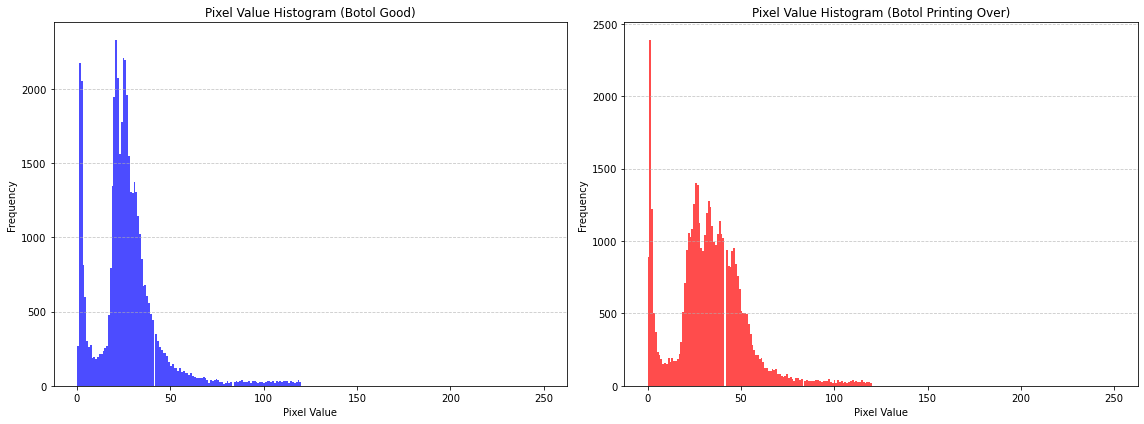

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate histograms for both images
histogram1 = np.histogram(image1_th1, bins=256, range=(0, 256))
hist_values1, bin_edges1 = histogram1

histogram2 = np.histogram(image2_th2, bins=256, range=(0, 256))
hist_values2, bin_edges2 = histogram2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot the histogram for image1_th1
ax1.hist(image1_th1.ravel(), bins=256, range=(0, 250), color='blue', alpha=0.7)
ax1.set_xlabel('Pixel Value')
ax1.set_ylabel('Frequency')
ax1.set_title('Pixel Value Histogram (Botol Good)')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot the histogram for image2_th2
ax2.hist(image2_th2.ravel(), bins=256, range=(0, 250), color='red', alpha=0.7)
ax2.set_xlabel('Pixel Value')
ax2.set_ylabel('Frequency')
ax2.set_title('Pixel Value Histogram (Botol Printing Over)')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Process Semua File dalam Folder

### Crop and Threshold

In [2]:
import os
import cv2
from PIL import Image
'''
# Folder input dan output
input_folder = r"E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\reject"
output_folder = r'E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\reject_cropping'

# Koordinat cropping
left2, upper2, right2, lower2 = 1200, 1200, 2020, 1750

# Ambil daftar nama file di folder input
file_names = os.listdir(input_folder)

# Loop melalui setiap file di folder input
for file_name in file_names:
    # Pastikan file adalah file gambar JPG
    if file_name.endswith(".jpg"):
        # Baca gambar
        image_path = os.path.join(input_folder, file_name)
        image = Image.open(image_path)

        # Crop gambar
        cropped_image = image.crop((left2, upper2, right2, lower2))

        # Terapkan thresholding
        image_gray = cv2.cvtColor(np.array(cropped_image), cv2.COLOR_RGB2GRAY)
        threshold_value = 120
        image_gray[image_gray > threshold_value] = 255

        # Simpan gambar hasil pengolahan
        output_path = os.path.join(output_folder, file_name)
        cv2.imwrite(output_path, image_gray)

print("Proses selesai.")
'''

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 46-47: truncated \UXXXXXXXX escape (<ipython-input-2-c39cfaf3ff2f>, line 36)

## GLCM and Histogram Analysis Semua File

In [8]:
import os
import numpy as np
import pandas as pd
from skimage.feature import greycomatrix, greycoprops
from skimage import io, color

# Fungsi untuk menghitung GLCM
def calculate_glcm(image):
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    glcm_features = []

    image = color.rgb2gray(image)  # Konversi citra ke grayscale

    for angle in angles:
        glcm = greycomatrix(image, [5], [angle], symmetric=True, normed=True)
        homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]
        energy = greycoprops(glcm, 'energy')[0, 0]
        glcm_features.extend([homogeneity, energy])

    return glcm_features

# Fungsi untuk melakukan analisis histogram
def analyze_histogram(image):
    hist, _ = np.histogram(image, bins=256, range=(0, 256))
    hist = hist[0:120]  # Ambil rentang histogram 50-100
    return hist

# Daftar folder dengan citra
input_folders = [
    r'E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\good_cropping',
    r'E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\Data Pilihan\warna pudar'
]

# Inisialisasi list untuk menyimpan data
data = []
folder_to_target = {}  # Kamus untuk memetakan nama folder ke target (angka)

# Loop melalui citra di folder
for idx, input_folder in enumerate(input_folders):
    for filename in os.listdir(input_folder):
        if filename.endswith('.jpg'):
            filepath = os.path.join(input_folder, filename)
            image = io.imread(filepath)

            if image is not None:
                # Hitung GLCM
                glcm_features = calculate_glcm(image)

                # Analisis histogram
                gray_image = color.rgb2gray(image)
                histogram = analyze_histogram(gray_image)

                # Tentukan target berdasarkan indeks folder
                folder_name = os.path.basename(input_folder)
                target = idx  # Menggunakan indeks folder sebagai target

                # Tambahkan data ke dalam list
                data.append([filename, *glcm_features, *histogram, target, folder_name])

# Simpan data ke dalam DataFrame Pandas
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
column_names = ['Nama File Citra'] + [f'GLCM Homogeneity {angle}' for angle in angles] + [f'GLCM Energy {angle}' for angle in angles] + [f'Histogram {i}' for i in range(0, 120)] + ['Target', 'Kategori']
df = pd.DataFrame(data, columns=column_names)

# Simpan DataFrame ke dalam file CSV
output_csv = r'E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\output_data_combined.csv'
df.to_csv(output_csv, index=False)

print(f'Data telah disimpan dalam {output_csv}')


C:\Users\mmasa\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:12: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  if sys.path[0] == '':
C:\Users\mmasa\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:50: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.


Data telah disimpan dalam E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\output_data_combined.csv


### Klasifikasi Jenis Cacat

Good = 0

Over Printing = 1

Print Kurang = 2

Warna Pudar = 3

## Plot PCA

In [9]:
import pandas as pd 

df_good = pd.read_csv(r'E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\output_data_combined.csv')
df_good.head()

,Nama File Citra,GLCM Homogeneity 0,GLCM Homogeneity 0.7853981633974483,GLCM Homogeneity 1.5707963267948966,GLCM Homogeneity 2.356194490192345,GLCM Energy 0,GLCM Energy 0.7853981633974483,GLCM Energy 1.5707963267948966,GLCM Energy 2.356194490192345,Histogram 0,...,Histogram 112,Histogram 113,Histogram 114,Histogram 115,Histogram 116,Histogram 117,Histogram 118,Histogram 119,Target,Kategori
0,GOOD_AVENT20230728112550235490.jpg,0.884175,0.861996,0.880803,0.859915,0.890854,0.865237,0.878839,0.859168,1576,...,23,26,30,24,25,22,31,22,0,good_cropping
1,GOOD_AVENT20230728112603438801.jpg,0.882390,0.859124,0.878495,0.857078,0.889527,0.862273,0.877282,0.856429,1524,...,27,23,22,33,34,27,30,19,0,good_cropping
2,GOOD_AVENT20230728112617171763.jpg,0.883151,0.860741,0.879519,0.858491,0.889754,0.863701,0.877484,0.857712,1500,...,20,34,36,26,47,32,28,16,0,good_cropping
3,GOOD_AVENT20230728112819960539.jpg,0.882352,0.859666,0.879070,0.857791,0.889961,0.863294,0.877542,0.857232,1556,...,29,30,24,22,30,28,23,21,0,good_cropping
4,GOOD_AVENT20230728112833471132.jpg,0.883655,0.861808,0.880053,0.859846,0.890735,0.865128,0.878790,0.859176,1481,...,32,28,30,16,43,19,22,21,0,good_cropping


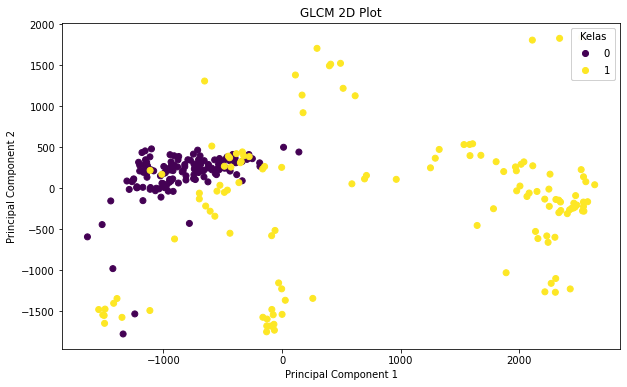

In [36]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the combined dataset from the CSV file
df_combined = pd.read_csv(r'E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\output_data_combined.csv')

# Select columns containing GLCM and Histogram data as input features
X = df_combined.iloc[:, 29:109].values  # Untuk Penentuan Warna Pudar

# Select the "Target" column as the target class
y = df_combined['Target'].values

# Perform PCA with 5 principal components
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

# Simpan model PCA ke dalam file menggunakan joblib
joblib.dump(pca, r'E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\hasil pengolahan\model\pca_model_1.pkl')

# Create a DataFrame to store PCA values, image names, and target values
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pca_df['Nama File Citra'] = df_combined['Nama File Citra'].reset_index(drop=True)
pca_df['Target'] = y  # Add the "Target" column to the DataFrame

# Plot the 2D PCA scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('GLCM 2D Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(),
                    title="Kelas", loc="upper right")
plt.gca().add_artist(legend1)
plt.show()

# Save PCA values, image names, and target values to a CSV file
pca_df.to_csv(r'E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\pca_values.csv', index=False)

In [11]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA

# Gabungkan data dari kedua kelas
df_combined = pd.read_csv(r'E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\output_data_combined.csv')

# Pilih kolom GLCM dan Histogram sebagai input
X = df_combined.iloc[:, 29:109].values

# Lakukan PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Tambahkan komponen PCA ke dataframe
df_combined['PCA1'] = X_pca[:, 0]
df_combined['PCA2'] = X_pca[:, 1]
df_combined['PCA3'] = X_pca[:, 2]

# Buat plot PCA 3D dengan Plotly
fig = px.scatter_3d(df_combined, x='PCA1', y='PCA2', z='PCA3', color='Target',
                     title='PCA 3D Plot', labels={'PCA1': 'Principal Component 1', 'PCA2': 'Principal Component 2', 'PCA3': 'Principal Component 3'})


# Tampilkan plot
fig.show()

## Ujicoba Classifier

In [37]:
# Import necessary libraries
import pandas as pd

df_combined = pd.read_csv(r'E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\pca_values.csv')
X = df_combined[['PC1', 'PC2', 'PC3']].values
y = df_combined['Target'].values

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

# Split the data into training and testing sets (assuming you have X_train, X_test, y_train, and y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a list of models
models = [
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("SVM", SVC()),
    ("Logistic Regression", LogisticRegression()),
    ("Naive Bayes", GaussianNB()),
    ("Linear Discriminant Analysis", LinearDiscriminantAnalysis()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("Multilayer Perceptron", MLPClassifier())
]

# Loop through the models and evaluate each one
for model_name, model in models:
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_rep)
    print()


Model: Decision Tree
Accuracy: 0.9375
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        40
           1       0.91      0.97      0.94        40

    accuracy                           0.94        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80


Model: Random Forest
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


Model: K-Nearest Neighbors
Accuracy: 0.975
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       1.00      0.95      0.97       

### Save the model

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import joblib

# Split the data into training and testing sets (assuming you have X_train, X_test, y_train, and y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the Random Forest model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Random Forest Model")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

# Save the trained model to a .h5 file using joblib
joblib.dump(rf_classifier, r'E:\Users\mmasa\Downloads\Philip Vision Checking\Data Botol\hasil pengolahan\model\model_1_RF.h5')


Random Forest Model
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



['E:\\Users\\mmasa\\Downloads\\Philip Vision Checking\\Data Botol\\hasil pengolahan\\model\\model_1_RF.h5']